Cheat sheet for Jupyter notebook pdf export using *nbconvert*.

## Notebook to pdf conversion {-}

Steps:

 0. Prerequisites
 1. Prepare template for conversion
 2. Choose cells to hide
 3. Convert

### Prerequisites {-}

 - Latex: Tested with [Miktex](https://miktex.org/).
 - Jupyter Lab or VsCode for runnin notebooks, classic Jupyter Notebooks for adding tags.

### Template {-}

Append following snippet as an *.tplx* file (e.g., *article_example.tplx*) to *nbconvert* latex template folder, e.g., in Windows path *C:/ProgramData/jupyter/nbconvert/templates/latex*.

```
((*- extends 'article.tplx' -*))

%===============================================================================
% Document level
%===============================================================================

((* block docclass *))
\documentclass[8pt,a4paper,prb]{article}
((* endblock docclass *))

%===============================================================================
% Output cells
%===============================================================================

% stream ouput
((* block stream *))
    \begin{Verbatim}[commandchars=\\\{\},fontsize=\footnotesize]
((( output.text | wrap_text(108) | escape_latex | ansi2latex )))
    \end{Verbatim}
((* endblock stream *))
```

### Hiding cells from conversion {-}

Selected cells or alternatively cell input can be hidden from output using `TagRemovePreprocessor` tags as per [this answer](https://stackoverflow.com/a/48084050). Tags in notebook have to be added in classic notebooks rather than in Jupyter Lab.

### Convert {-}

Command for conversion:

`jupyter nbconvert --to pdf --template article_example <notebook_name>.ipynb --TagRemovePreprocessor.remove_cell_tags={\"remove_cell\"} --TagRemovePreprocessor.remove_input_tags={\"remove_input\"}`

## Some hints {-}

 - Careful with backslashes, they might result in failed conversion.
 - Title numbering can be suppressed by "{-}".
 - Using "\\text{}" in math mode might cause conversion to fail, perhaps due to backlash? 
 - There should be no spaces before closing "\$" in math mode, otherwise might complain about missing dollar sign.
 - Better run notebook in Jupyter Lab rather than in VSCode before export; the latter may produce notebooks unsuitable for conversion for some reason.

## Test cells for export {-}

Some markdown text with Latex: $y = \alpha  + \beta x + \epsilon$

In [1]:
import numpy as np
import pandas as pd

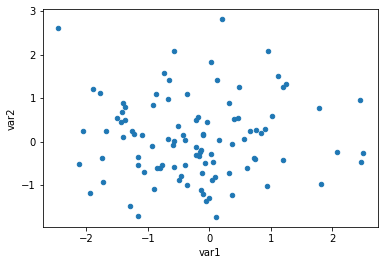

In [2]:
_ = pd.DataFrame(
    np.random.normal(size=[100, 2]),
    columns=["var1", "var2"]
).plot(x="var1", y="var2", kind="scatter")